<a href="https://colab.research.google.com/github/sentongo-web/MASTERS_DEGREE_PROJECT_MSDS/blob/main/Final_valuation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview: Detecting Undervaluation and Overvaluation of Imported Goods
## Author: Paul Sentongo

## Introduction
The objective of this project is to detect undervaluation and overvaluation of imported goods by predicting the unit price of a given commodity in local currency. This is critical for ensuring fair trade practices and accurate taxation. This project involves several stages including data preparation, exploratory data analysis, feature engineering, model building, evaluation, and deployment.

## Key Steps
1. **Data Collection and Preparation**
   - Load the dataset and understand its structure.
   - Clean and preprocess the data.
   - Handle missing values and detect outliers.
   
2. **Exploratory Data Analysis (EDA)**
   - Conduct descriptive statistics to understand data distribution.
   - Visualize data to identify patterns and relationships.

3. **Feature Engineering**
   - Create new features that may enhance model performance.
   - Normalize or scale features if necessary.

4. **Model Building**
   - Select appropriate machine learning algorithms.
   - Train and validate models using cross-validation.
   
5. **Model Evaluation**
   - Evaluate models using relevant metrics.
   - Select the best-performing model based on evaluation results.

6. **Model Deployment**
   - Preparing the final model for deployment.
   - Deploying the model using a suitable platform (e.g., Streamlit, Flask for web deployment).

7. **Monitoring and Maintenance**
   - Monitor model performance in production.
   - Update the model as necessary based on new data and feedback.

## Tools and Technologies
- **Programming Language:** Python
- **Libraries:** Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, Flask
- **Deployment Platform:** Streamlit, Flask, Docker

This approach ensures a robust solution for detecting pricing discrepancies in imported goods, thereby aiding in regulatory compliance and economic fairness.

### MOUNTING THE DRIVE

In [ ]:
#Mounting the drive since dataset is saved on the drive
from google.colab import drive
drive.mount('/content/drive')

### SETTING THE PATH FOR THE DATA

In [ ]:
#setting path for the data dictionary and the dataset
file_path = '/content/drive/My Drive/ScaleDown.xlsx'
dict_path = '/content/drive/My Drive/Data_Dictionary.xlsx'

### IMPORTING LIBRARIES TO BE USED FOR THE PROJECT

In [ ]:
# importing libraries to be used in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import Trainer, TrainingArguments
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Important Variables definition

| Attribute           | Description                                                       |
| :------------------ | :---------------------------------------------------------------- |
| TAR_HSC_NB1         | Harmonized system commodity code (HS code)                        |
| GDS_ORG_CTY         | Country of origin (code)                                          |
| VIT_WGT_GRS         | Gross mass (including packaging)                                  |
| VIT_WGT_NET         | Net mass (excluding packaging)                                    |
| TAR_PRI             | Item price                                                        |
| VIT_CIF             | CIF (Cost, Insurance, and Freight) value in local currency        |
| TAX_AMT             | Duties and taxes amount for the item                              |
| UNIT_PRICE_LOCAL    | Unit price in local currency                                      |
| TAR_VMT             | Valuation method                                                  |
| VIT_INV_AMT_NMU     | Invoice amount in national monetary units                         |
| VIT_INV_CUR_COD     | Currency code for the invoice                                     |
| VIT_CST             | Amount of added costs in national currency                        |
| VIT_IFR_AMT_NMU     | Amount of internal freight in national currency                   |
| VIT_OTC_AMT_NMU     | Additional charges in national monetary units                     |


### READING THE DATASET AND TEH DATA DICTIONARY

In [ ]:
#Reading the dataset and the data dictionary
data = pd.read_excel(file_path)
data_dict = pd.read_excel(dict_path)

### CHECKING FOR DATATYPES IN THE VARIABLES

In [ ]:
#To check the data types of the variables in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 85 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   INSTANCEID       1048575 non-null  int64  
 1   KEY_ITM_NBR      1048575 non-null  int64  
 2   PCK_NBR          992454 non-null   float64
 3   CONC             1048575 non-null  int64  
 4   TAR_SUP_QTY      113 non-null      float64
 5   PCK_MRK1         983757 non-null   object 
 6   PCK_MRK2         405762 non-null   object 
 7   PCK_TYP_COD      757517 non-null   object 
 8   PCK_TYP_NAM      990697 non-null   object 
 9   TAR_HSC_NB1      1047822 non-null  float64
 10  TAR_PRC_EXT      992460 non-null   float64
 11  TAR_PRC_NAT      992443 non-null   float64
 12  TAR_QUO          6174 non-null     object 
 13  TAR_PRI          697458 non-null   float64
 14  TAR_VMT          7 non-null        object 
 15  TAR_AIC          0 non-null        float64
 16  GDS_ORG_CTY      1

### Check for shape of dataset

In [ ]:
# To check the shape of the dataset
data.shape

(1048575, 85)

With over a million rows, this dataset is likely to provide statistically significant insights and trends. It is important to have such a size of a dataset in our task. Having 85 columns suggests a variety of attributes

### CHECKING THE HEAD OF THE DATASET

In [ ]:
# Displaying the first 3 features of the dataset
data.head(5)

,INSTANCEID,KEY_ITM_NBR,PCK_NBR,CONC,TAR_SUP_QTY,PCK_MRK1,PCK_MRK2,PCK_TYP_COD,PCK_TYP_NAM,TAR_HSC_NB1,...,FLP1,DOC_REF_DAT,DOC_REF_NBR,WRI_SUP_COD,WRI_SUP_NAM,WRI_SUP_QTY,WRI_PRG,TAR_HSC_NB3,GDS_DS3,LNK_TPT
0,1,1,25.0,11,NaN,Without marks,NaN,CT,CARTON,85441900.0,...,(BLOB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SZHAS2018
1,1,2,550.0,12,NaN,Without marks,NaN,CT,CARTON,69010000.0,...,(BLOB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SZHAS2018
2,1,3,2.0,13,NaN,Without marks,NaN,CT,CARTON,83023000.0,...,(BLOB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SZHAS2018
3,1,4,5.0,14,5.0,Without marks,NaN,CT,CARTON,94015000.0,...,(BLOB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SZHAS2018
4,1,5,5.0,15,5.0,Without marks,NaN,CT,CARTON,94031000.0,...,(BLOB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SZHAS2018


### Given the size of the dataset, we have chosen to narrow down the task to concentarte on the chosen variables highlighted above. This is done with respect to the computing resources available.

#### CREATING THE DEPENDENT / PREDICTOR VARIABLE

In [ ]:
#Creating UNIT_PRICE_LOCAL
    # Handling potential division by zero or missing values

data['UNIT_PRICE_LOCAL'] = np.where(
        (data['TAR_SUP_QTY'].notna()) & (data['TAR_SUP_QTY'] != 0),
        data['VIT_INV_AMT_NMU'] / data['TAR_SUP_QTY'],
        np.nan
    )

### SELECTING THE MOST RELEVANT VARIABLES

In [ ]:
columns_to_keep = [
    'TAR_HSC_NB1',       # Harmonized system commodity code (HS code)
    'GDS_ORG_CTY',       # Country of origin (code)
    'VIT_WGT_GRS',       # Gross mass (including packaging)
    'VIT_WGT_NET',       # Net mass (excluding packaging)
    'TAR_PRI',           # Item price
    'VIT_CIF',           # CIF (Cost, Insurance, and Freight) value in local currency
    'TAX_AMT',           # Duties and taxes amount for the item
    'UNIT_PRICE_LOCAL',  # Unit price in local currency
    'TAR_VMT',           # Valuation method
    'VIT_INV_AMT_NMU',   # Invoice amount in national monetary units
    'VIT_INV_CUR_COD',   # Currency code for the invoice
    'VIT_CST',           # Amount of added costs in national currency
    'VIT_IFR_AMT_NMU',   # Amount of internal freight in national currency
    'VIT_OTC_AMT_NMU'    # Additional charges in national monetary units
]

data_processed = data[columns_to_keep].copy()


### DATA CLEANING
### Duplicates, Missing values, Outliers

In [ ]:
# Check for duplicate rows in the DataFrame
duplicates = data_processed.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Calculate the percentage of duplicate rows
percentage_duplicates = (num_duplicates / len(data_processed)) * 100

# Display the result
print(f"Number of duplicate rows: {num_duplicates}")
print(f"Percentage of duplicate rows: {percentage_duplicates:.2f}%")

Number of duplicate rows: 145339
Percentage of duplicate rows: 13.86%


#### CLEAN THE DUPLICATES

In [ ]:
# Drop duplicate rows
if percentage_duplicates > 0:
    data_processed = data_processed.drop_duplicates().reset_index(drop=True)
    print("Duplicate rows have been dropped.")
else:
    print("No duplicate rows found.")

Duplicate rows have been dropped.


### Checking for missing values

In [ ]:
# Calculate the total number of missing values
total_missing = data_processed.isnull().sum().sum()

# Calculate the percentage of missing values relative to the entire dataset
total_cells = data_processed.size
overall_missing_percentage = (total_missing / total_cells) * 100

# Display the result
print(f"Overall missing values: {total_missing}")
print(f"Percentage of missing values in the entire dataset: {overall_missing_percentage:.2f}%")


Overall missing values: 2271429
Percentage of missing values in the entire dataset: 17.96%


In [ ]:
# Check for missing values in the DataFrame
missing_values = data_processed.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(data_processed)) * 100

# Display the result
print("Missing values (count and percentage):")
print(pd.DataFrame({'Missing Count': missing_values, 'Percentage': missing_percentage}))

Missing values (count and percentage):
                  Missing Count  Percentage
TAR_HSC_NB1                   1    0.000111
GDS_ORG_CTY                 229    0.025353
VIT_WGT_GRS               11873    1.314496
VIT_WGT_NET               11889    1.316267
TAR_PRI                  287136   31.789698
VIT_CIF                   12041    1.333096
TAX_AMT                    3602    0.398788
UNIT_PRICE_LOCAL         903125   99.987711
TAR_VMT                  903229   99.999225
VIT_INV_AMT_NMU           12065    1.335753
VIT_INV_CUR_COD           80864    8.952699
VIT_CST                   12166    1.346935
VIT_IFR_AMT_NMU           12798    1.416905
VIT_OTC_AMT_NMU           20411    2.259764


In [ ]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903236 entries, 0 to 903235
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TAR_HSC_NB1       903235 non-null  float64
 1   GDS_ORG_CTY       903007 non-null  object 
 2   VIT_WGT_GRS       891363 non-null  float64
 3   VIT_WGT_NET       891347 non-null  float64
 4   TAR_PRI           616100 non-null  float64
 5   VIT_CIF           891195 non-null  float64
 6   TAX_AMT           899634 non-null  float64
 7   UNIT_PRICE_LOCAL  111 non-null     float64
 8   TAR_VMT           7 non-null       object 
 9   VIT_INV_AMT_NMU   891171 non-null  float64
 10  VIT_INV_CUR_COD   822372 non-null  object 
 11  VIT_CST           891070 non-null  float64
 12  VIT_IFR_AMT_NMU   890438 non-null  float64
 13  VIT_OTC_AMT_NMU   882825 non-null  float64
dtypes: float64(11), object(3)
memory usage: 96.5+ MB


### APPROACH TO HANDLING MISSING VALUES

In [ ]:
# Calculate missing value percentages for each column
missing_percentage = (data_processed.isnull().sum() / len(data_processed)) * 100

# Identify columns to drop (more than 60% missing values), excluding the target variable
columns_to_drop = [
    col for col in missing_percentage[missing_percentage > 60].index
    if col != 'UNIT_PRICE_LOCAL'
]

# Drop the identified columns
data_processed = data_processed.drop(columns=columns_to_drop)
print(f"Columns dropped due to >60% missing values (excluding target): {columns_to_drop}")

# Handle missing values for the remaining columns
for column in data_processed.columns:
    if column != 'UNIT_PRICE_LOCAL':  # Exclude the target variable from general imputation
        if data_processed[column].dtype == 'float64':  # Numeric columns
            # Impute with the mean
            data_processed[column].fillna(data_processed[column].mean(), inplace=True)
            print(f"Numeric column '{column}' missing values filled with mean.")
        elif data_processed[column].dtype == 'object':  # Categorical columns
            # Impute with the mode
            data_processed[column].fillna(data_processed[column].mode()[0], inplace=True)
            print(f"Categorical column '{column}' missing values filled with mode.")

# Retain `UNIT_PRICE_LOCAL` as-is for now, missing values will need a separate strategy
print(f"\nTarget variable 'UNIT_PRICE_LOCAL' retained with {data_processed['UNIT_PRICE_LOCAL'].isnull().sum()} missing values.")


Columns dropped due to >60% missing values (excluding target): ['TAR_VMT']
Numeric column 'TAR_HSC_NB1' missing values filled with mean.
Categorical column 'GDS_ORG_CTY' missing values filled with mode.
Numeric column 'VIT_WGT_GRS' missing values filled with mean.
Numeric column 'VIT_WGT_NET' missing values filled with mean.
Numeric column 'TAR_PRI' missing values filled with mean.
Numeric column 'VIT_CIF' missing values filled with mean.
Numeric column 'TAX_AMT' missing values filled with mean.
Numeric column 'VIT_INV_AMT_NMU' missing values filled with mean.
Categorical column 'VIT_INV_CUR_COD' missing values filled with mode.
Numeric column 'VIT_CST' missing values filled with mean.
Numeric column 'VIT_IFR_AMT_NMU' missing values filled with mean.
Numeric column 'VIT_OTC_AMT_NMU' missing values filled with mean.

Target variable 'UNIT_PRICE_LOCAL' retained with 903125 missing values.


In [ ]:
data_processed.dropna(subset=['UNIT_PRICE_LOCAL'], inplace=True)  # Critical column

### Checking again to confirm missing values

In [ ]:
# Check for missing values in the DataFrame
missing_values = data_processed.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(data_processed)) * 100

# Display the result
print("Missing values (count and percentage):")
print(pd.DataFrame({'Missing Count': missing_values, 'Percentage': missing_percentage}))

Missing values (count and percentage):
                  Missing Count  Percentage
TAR_HSC_NB1                   0         0.0
GDS_ORG_CTY                   0         0.0
VIT_WGT_GRS                   0         0.0
VIT_WGT_NET                   0         0.0
TAR_PRI                       0         0.0
VIT_CIF                       0         0.0
TAX_AMT                       0         0.0
UNIT_PRICE_LOCAL              0         0.0
VIT_INV_AMT_NMU               0         0.0
VIT_INV_CUR_COD               0         0.0
VIT_CST                       0         0.0
VIT_IFR_AMT_NMU               0         0.0
VIT_OTC_AMT_NMU               0         0.0


###DESCRIPTIVE STATISTICS TO DETERMINE ANY OUTLIERS FROM DATA DISTRIBUTION

In [ ]:
data_processed.describe()

,TAR_HSC_NB1,VIT_WGT_GRS,VIT_WGT_NET,TAR_PRI,VIT_CIF,TAX_AMT,UNIT_PRICE_LOCAL,VIT_INV_AMT_NMU,VIT_CST,VIT_IFR_AMT_NMU,VIT_OTC_AMT_NMU
count,1.110000e+02,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.0
mean,8.017724e+07,9737.870420,5638.933761,3361.896486,3387.013604,784.882613,1871.215476,3361.896486,25.117117,25.117117,0.0
std,1.780508e+07,20139.518698,7616.083050,8487.762938,8490.174020,2300.131715,6908.060753,8487.762938,264.625249,264.625249,0.0
min,2.064900e+06,1.000000,1.000000,6.810000,6.810000,1.450000,0.023011,6.810000,0.000000,0.000000,0.0
25%,8.416345e+07,200.000000,200.000000,140.170000,140.170000,38.825000,5.002131,140.170000,0.000000,0.000000,0.0
50%,8.513100e+07,6352.000000,920.000000,471.880000,471.880000,136.130000,33.852000,471.880000,0.000000,0.000000,0.0
75%,8.703331e+07,15664.000000,6804.000000,1800.265000,1800.265000,413.300000,264.231000,1800.265000,0.000000,0.000000,0.0
max,9.608100e+07,200000.000000,23500.000000,42117.040000,42117.040000,16918.400000,42117.040000,42117.040000,2788.000000,2788.000000,0.0


#### Observation from the descriptive stats

##### TAR_HSC_NB1: The Harmonized System commodity codes show a wide range (min: ~2 million, max: ~96 million). The large standard deviation suggests considerable variability, but outliers are not evident from the statistics alone.

##### VIT_WGT_GRS and VIT_WGT_NET: Gross and net weights vary significantly, with a mean of ~9738 and ~5639, respectively. However, extreme values are present, with the max gross weight at 200,000 and net weight at 23,500, while 75% of the data is well below these values, indicating potential outliers.

##### TAR_PRI, VIT_CIF, and UNIT_PRICE_LOCAL: These monetary values have high variability. For example, UNIT_PRICE_LOCAL ranges from 0.023 to 42,117, with a mean of ~1,871. The max values far exceed the 75th percentile, suggesting the presence of outliers.

##### TAX_AMT: Tax amounts are similarly skewed, with a maximum of 16,918 compared to a mean of ~785 and a 75th percentile of ~413. These statistics indicate outliers in tax amounts.

##### VIT_INV_AMT_NMU, VIT_CST, and VIT_IFR_AMT_NMU: Invoice-related variables generally align with the other monetary values, but the high maximums for VIT_CST (2,788) and VIT_IFR_AMT_NMU compared to their interquartile ranges suggest outliers.

##### VIT_OTC_AMT_NMU: This column has zeros for all entries, indicating no variability and potentially making it irrelevant for modeling.

### Key Observations:
#### Outliers: Likely present in VIT_WGT_GRS, VIT_WGT_NET, TAR_PRI, VIT_CIF, TAX_AMT, and UNIT_PRICE_LOCAL. Outlier detection and handling (e.g., trimming) should be considered for these variables.
#### Zeros in Data: Columns like VIT_OTC_AMT_NMU might need exclusion from the analysis as they add no value to the dataset.

##### DELETING THE LESS IMPORTANT COLUMN

In [ ]:
# Drop the 'VIT_OTC_AMT_NMU' column
data_processed = data_processed.drop(columns=['VIT_OTC_AMT_NMU'])

print("Column 'VIT_OTC_AMT_NMU' has been removed.")


Column 'VIT_OTC_AMT_NMU' has been removed.


### DETECTING OUTLIERS USING THE IQR METHOD
The Interquartile Range (IQR) method is a robust way to detect outliers.

In [ ]:
# Detect outliers using the IQR method for all numeric columns
numeric_columns = data_processed.select_dtypes(include=['float64']).columns

outliers_summary = {}

for column in numeric_columns:
    Q1 = data_processed[column].quantile(0.25)  # 25th percentile
    Q3 = data_processed[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = data_processed[(data_processed[column] < lower_bound) | (data_processed[column] > upper_bound)]

    # Save summary of outliers
    outliers_summary[column] = {
        "num_outliers": len(outliers),
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }

    print(f"{column}: {len(outliers)} outliers detected.")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}\n")

# Optional: Display the full summary of outliers for analysis
print("\nOutliers Summary:")
print(pd.DataFrame(outliers_summary).T)


TAR_HSC_NB1: 46 outliers detected.
Lower Bound: 79858658.5, Upper Bound: 91338102.5

VIT_WGT_GRS: 1 outliers detected.
Lower Bound: -22996.0, Upper Bound: 38860.0

VIT_WGT_NET: 20 outliers detected.
Lower Bound: -9706.0, Upper Bound: 16710.0

TAR_PRI: 14 outliers detected.
Lower Bound: -2349.9725, Upper Bound: 4290.407499999999

VIT_CIF: 15 outliers detected.
Lower Bound: -2349.9725, Upper Bound: 4290.407499999999

TAX_AMT: 14 outliers detected.
Lower Bound: -522.8874999999999, Upper Bound: 975.0124999999999

UNIT_PRICE_LOCAL: 21 outliers detected.
Lower Bound: -383.8411721311475, Upper Bound: 653.0743032786885

VIT_INV_AMT_NMU: 14 outliers detected.
Lower Bound: -2349.9725, Upper Bound: 4290.407499999999

VIT_CST: 1 outliers detected.
Lower Bound: 0.0, Upper Bound: 0.0

VIT_IFR_AMT_NMU: 1 outliers detected.
Lower Bound: 0.0, Upper Bound: 0.0


Outliers Summary:
                  num_outliers   lower_bound   upper_bound
TAR_HSC_NB1               46.0  7.985866e+07  9.133810e+07
VIT_WGT

## OUTLIERS TREATMENT

### DATA TRIMMING APPROACH TO HANDLE OUTLIERS

#### To handle outliers using data trimming, we clip the values that fall outside the calculated lower and upper bounds. This ensures that no outlier data points influence the analysis while preserving the overall dataset's integrity.
#### Approach:
##### Clip values: Any values below the lower bound or above the upper bound will be replaced with the nearest valid bound.
##### Target Columns: We'll apply this trimming to all numeric columns that had outliers based on the IQR method.

In [ ]:
# Define a function to trim values based on the IQR bounds
def trim_outliers(df, column, lower_bound, upper_bound):
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# List of columns and their IQR bounds for trimming
outlier_bounds = {
    'TAR_HSC_NB1': (79858658.5, 91338102.5),
    'VIT_WGT_GRS': (-22996.0, 38860.0),
    'VIT_WGT_NET': (-9706.0, 16710.0),
    'TAR_PRI': (-2349.9725, 4290.407499999999),
    'VIT_CIF': (-2349.9725, 4290.407499999999),
    'TAX_AMT': (-522.8874999999999, 975.0124999999999),
    'UNIT_PRICE_LOCAL': (-383.8411721311475, 653.0743032786885),
    'VIT_INV_AMT_NMU': (-2349.9725, 4290.407499999999),
    'VIT_CST': (0.0, 0.0),  # Since the lower and upper bounds are 0, we'll handle these separately
    'VIT_IFR_AMT_NMU': (0.0, 0.0)
}

# Trim outliers for each column based on the provided bounds
for column, (lower_bound, upper_bound) in outlier_bounds.items():
    trim_outliers(data_processed, column, lower_bound, upper_bound)

# Confirm the trimming is done by checking the summary of trimmed columns
print("Outlier trimming complete. Here is the summary of the adjusted columns:")
print(data_processed.describe())


Outlier trimming complete. Here is the summary of the adjusted columns:
        TAR_HSC_NB1   VIT_WGT_GRS   VIT_WGT_NET      TAR_PRI      VIT_CIF  \
count  1.110000e+02    111.000000    111.000000   111.000000   111.000000   
mean   8.560875e+07   8286.158708   4954.269279  1261.227523  1274.762725   
std    3.871594e+06   9060.661788   6286.739029  1509.827360  1530.235318   
min    7.985866e+07      1.000000      1.000000     6.810000     6.810000   
25%    8.416345e+07    200.000000    200.000000   140.170000   140.170000   
50%    8.513100e+07   6352.000000    920.000000   471.880000   471.880000   
75%    8.703331e+07  15664.000000   6804.000000  1800.265000  1800.265000   
max    9.133810e+07  38860.000000  16710.000000  4290.407500  4290.407500   

          TAX_AMT  UNIT_PRICE_LOCAL  VIT_INV_AMT_NMU  VIT_CST  VIT_IFR_AMT_NMU  
count  111.000000        111.000000       111.000000    111.0            111.0  
mean   281.259414        182.307911      1261.227523      0.0           

### CONFIRMING FOR OUTLIERS WITH BOXPLOTS

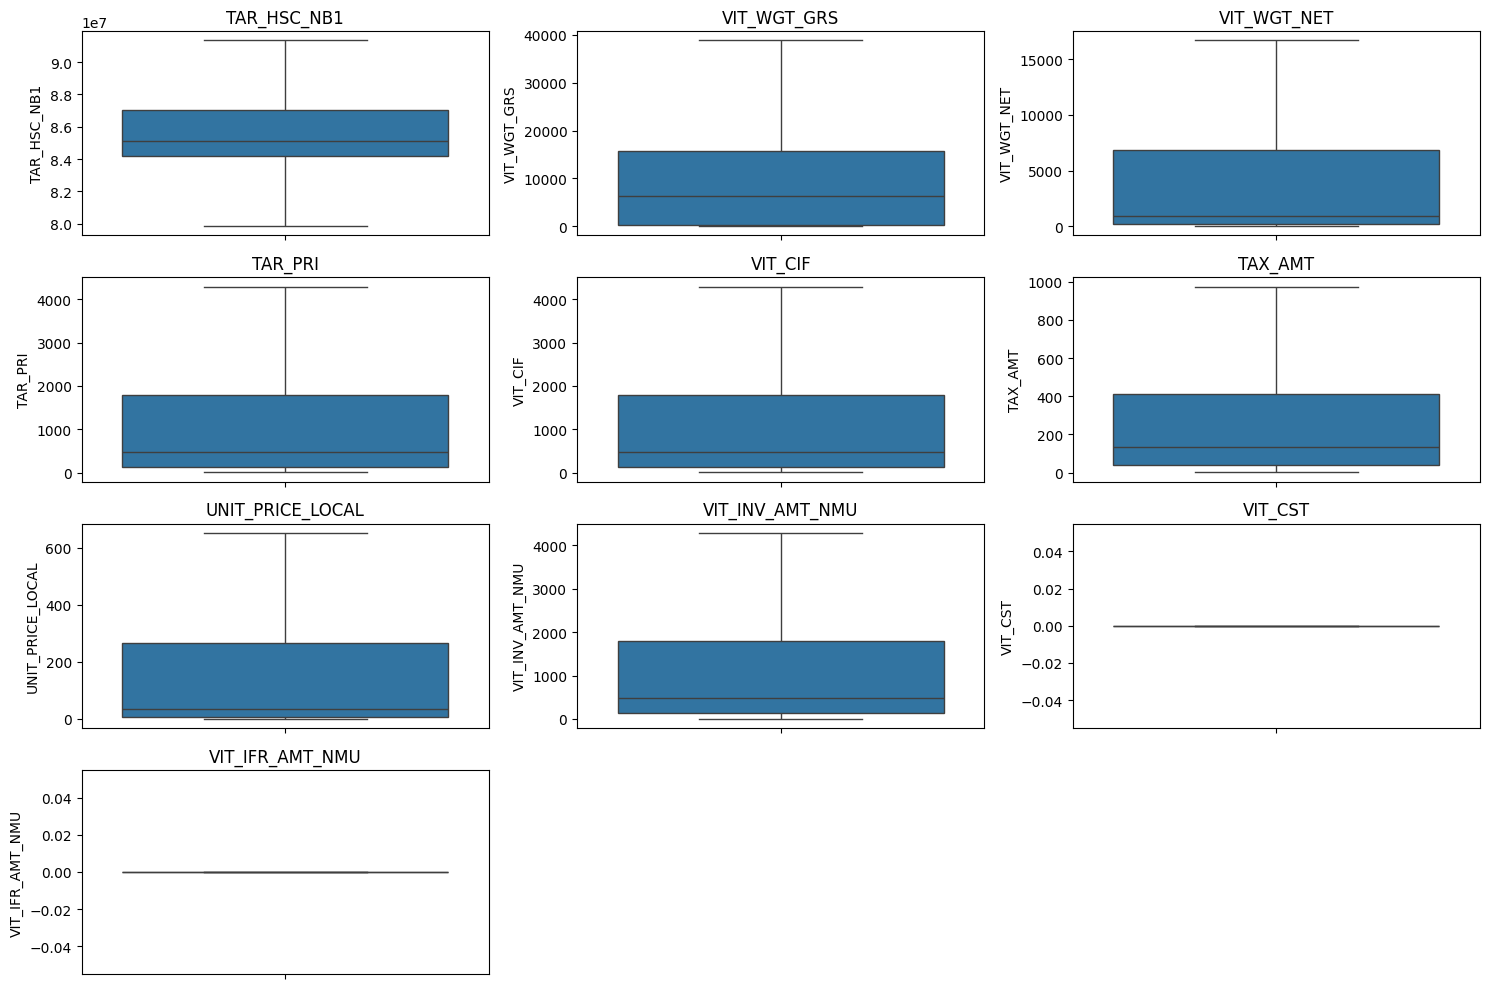

In [ ]:
plt.figure(figsize=(15, 10))  # Adjusting figure size as needed
num_cols = len(data_processed.select_dtypes(include=['float64']).columns)
# Calculate the number of rows and columns for subplots
num_rows = (num_cols + 2) // 3  # Ensure enough rows to accommodate all columns

for i, col in enumerate(data_processed.select_dtypes(include=['float64']).columns):
    plt.subplot(num_rows, 3, i + 1)  # Dynamically adjust subplot grid
    sns.boxplot(y=data_processed[col])
    plt.title(col)
    plt.tight_layout()  # Adjust spacing between subplots

plt.show()

#### The boxplots confirm outliers have been handled and not existent anyomore

### RENAMING THE VARIABLES

In [ ]:
# Define the renaming dictionary based on your specifications
rename_dict = {
    'TAR_HSC_NB1': 'HS code',
    'GDS_ORG_CTY': 'Country of origin - code',
    'VIT_WGT_GRS': 'Gross mass',
    'VIT_WGT_NET': 'Net mass',
    'TAR_PRI': 'Item price',
    'VIT_CIF': 'CIF value in local currency',
    'TAX_AMT': 'Duties and taxes amount',
    'UNIT_PRICE_LOCAL': 'Unit price in local currency',
    'TAR_VMT': 'Valuation method',
    'VIT_INV_AMT_NMU': 'Invoice amount in national currency',
    'VIT_INV_CUR_COD': 'Currency code for the invoice',
    'VIT_CST': 'Added costs in local currency',
    'VIT_IFR_AMT_NMU': 'Internal freight in local currency',
    'VIT_OTC_AMT_NMU': 'Additional charges in local currency'
}

# Rename the columns
data_processed.rename(columns=rename_dict, inplace=True)


In [ ]:
data_processed.columns

Index(['HS code', 'Country of origin - code', 'Gross mass', 'Net mass',
       'Item price', 'CIF value in local currency', 'Duties and taxes amount',
       'Unit price in local currency', 'Invoice amount in national currency',
       'Currency code for the invoice', 'Added costs in local currency',
       'Internal freight in local currency'],
      dtype='object')

In [ ]:
data_processed.head()

,HS code,Country of origin - code,Gross mass,Net mass,Item price,CIF value in local currency,Duties and taxes amount,Unit price in local currency,Invoice amount in national currency,Currency code for the invoice,Added costs in local currency,Internal freight in local currency
3,91338102.5,CN,194.54,150.0,1285.39,1285.39,447.56,257.0780,1285.39,USD,0.0,0.0
4,91338102.5,CN,194.54,150.0,1344.86,1344.86,468.26,268.9720,1344.86,USD,0.0,0.0
5,85181000.0,CN,77.82,50.0,102.91,102.91,35.81,51.4550,102.91,USD,0.0,0.0
6,91338102.5,CN,972.72,900.0,1543.66,1543.66,537.49,61.7464,1543.66,USD,0.0,0.0
7,85163100.0,CN,155.64,124.0,164.66,164.66,92.55,41.1650,164.66,USD,0.0,0.0


In [ ]:
data_processed.shape

(111, 12)

##DATA VISUALIZATION

##### Visualizing the categorical columns

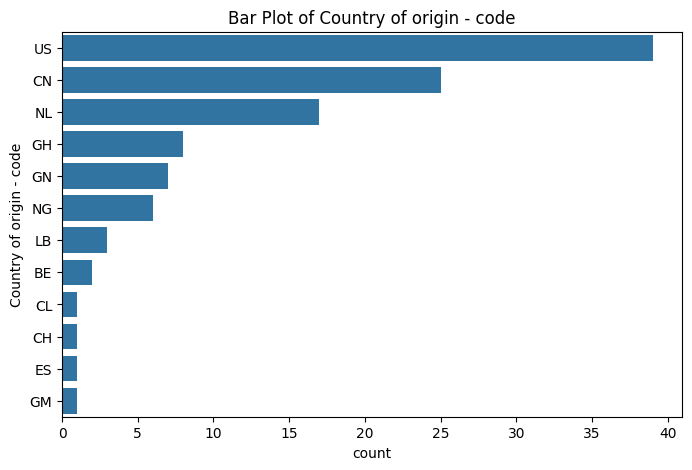

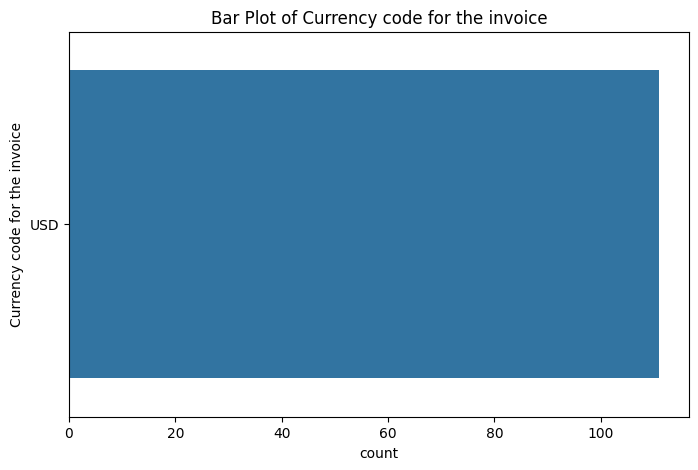

In [ ]:
# Bar plot for categorical variables
categorical_columns = data_processed.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=data_processed[column], order=data_processed[column].value_counts().index)
    plt.title(f"Bar Plot of {column}")
    plt.show()

#### HISTOGRAMS TO VISUALIZE DISTRIBUTION OF THE VARIABLES

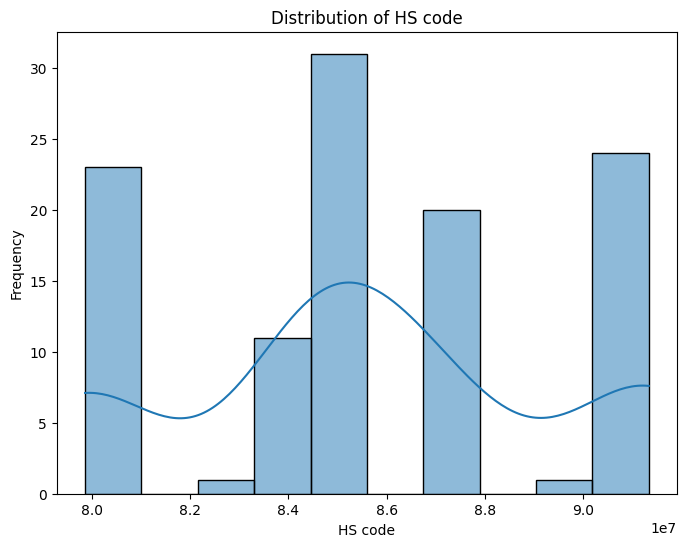

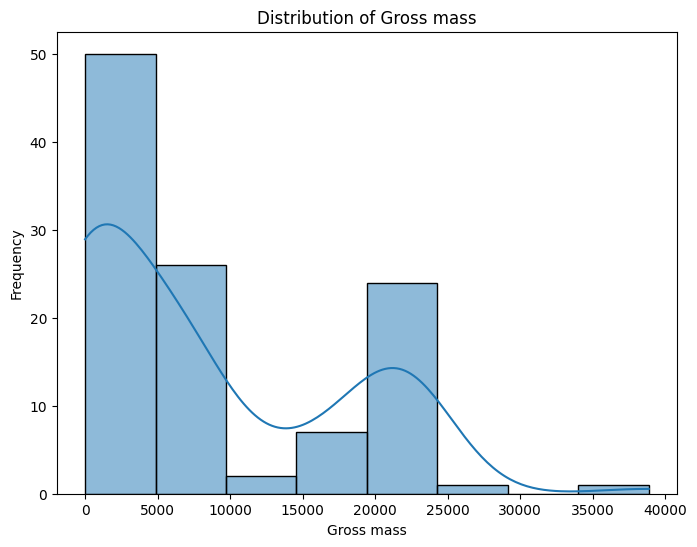

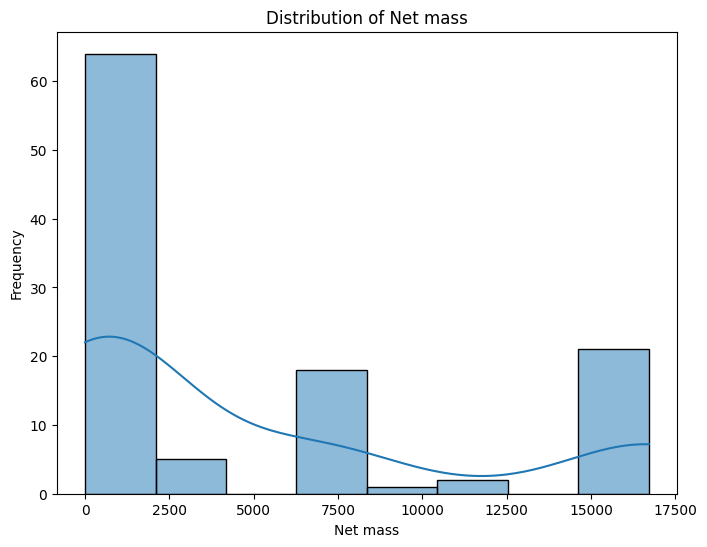

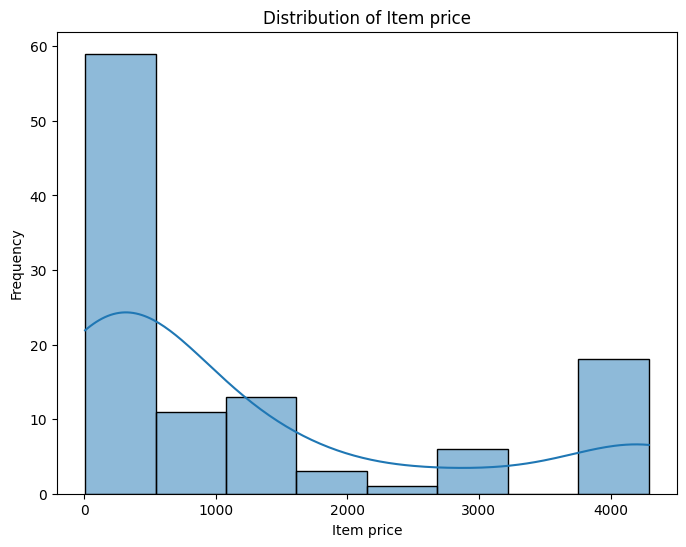

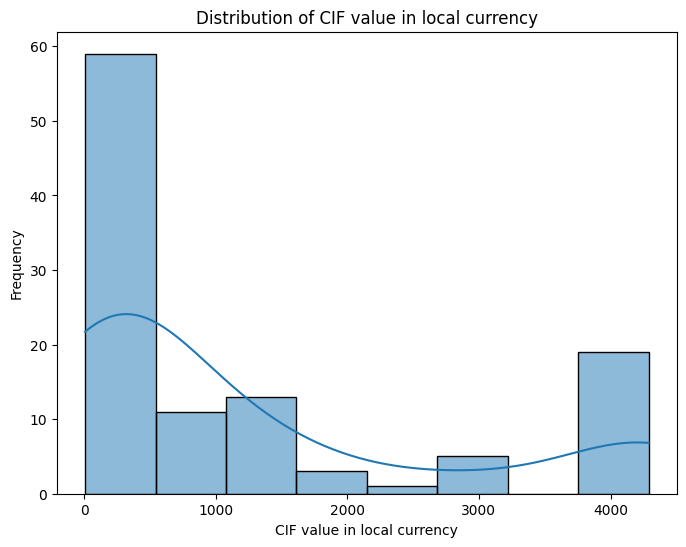

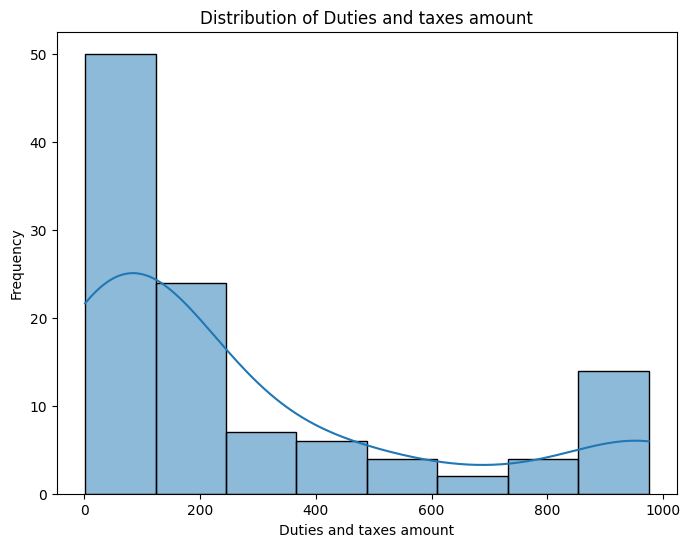

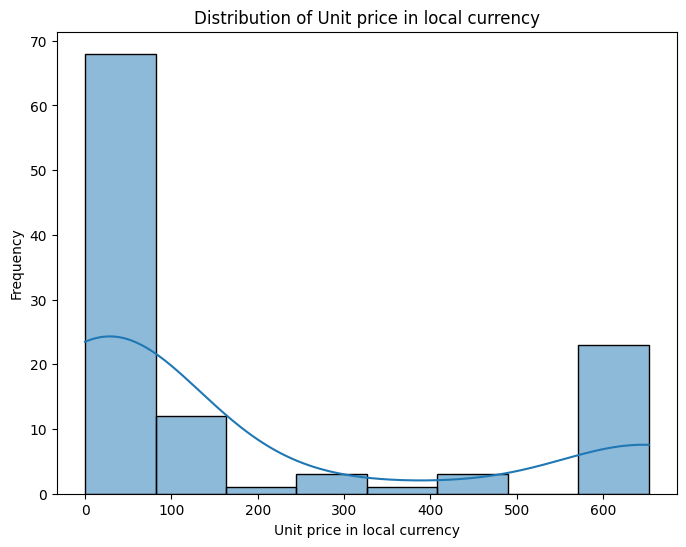

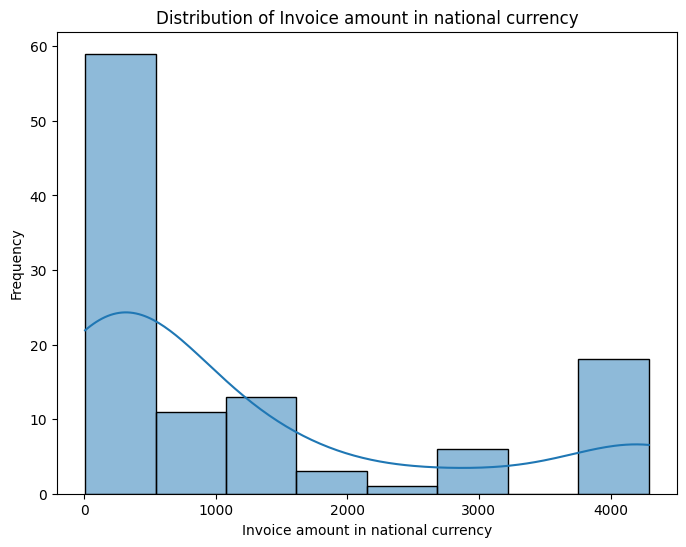

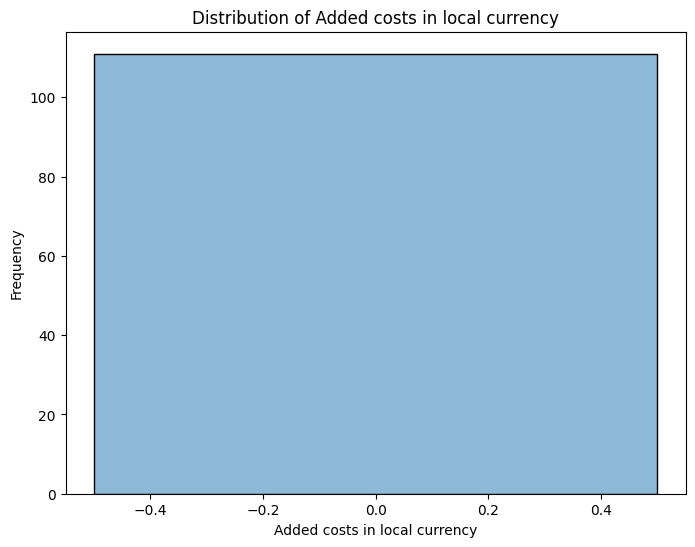

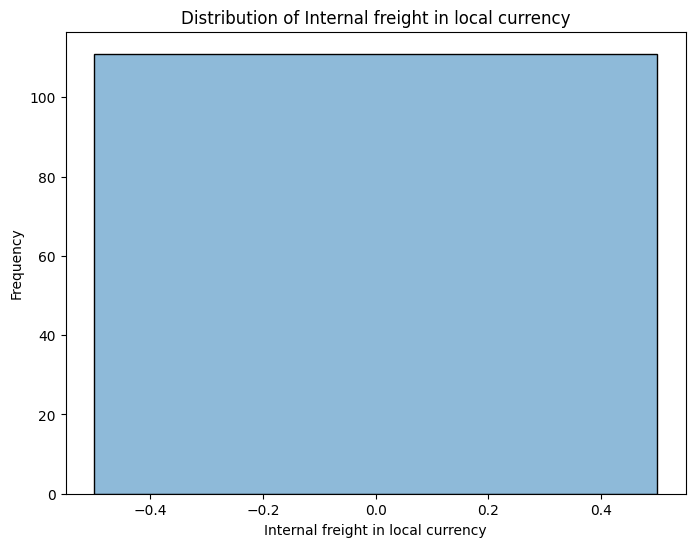

In [ ]:
numerical_features = data_processed.select_dtypes(include=np.number).columns
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_processed[col], kde=True)  # Include a kernel density estimate
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### SCATTERPLOTS TO SHOW RELATIONSHIPS BETWEEN CONTINUOUS COLUMNS

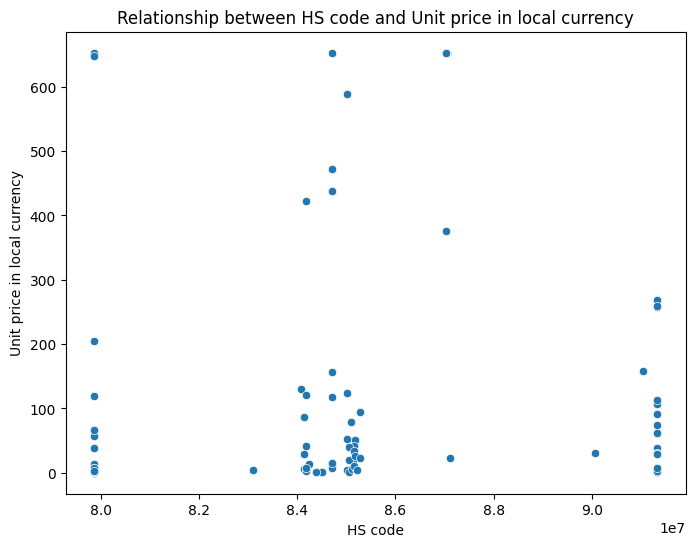

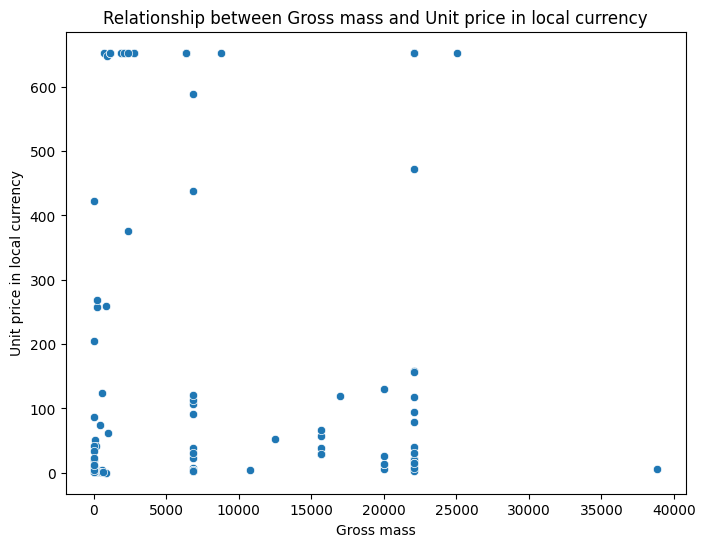

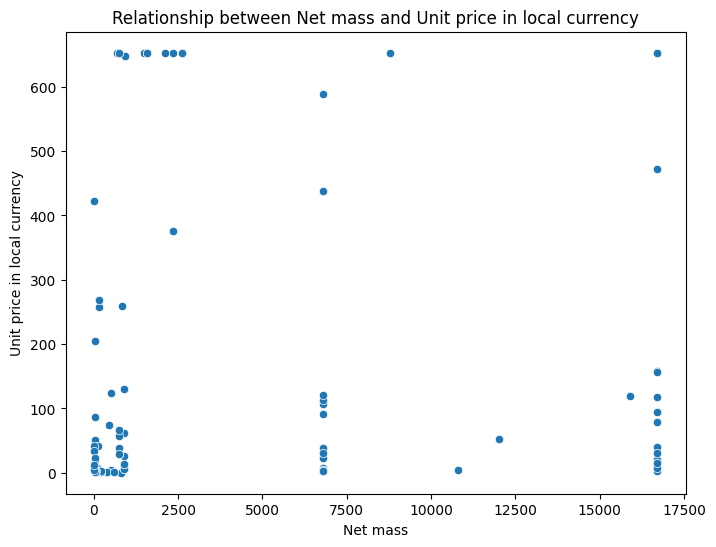

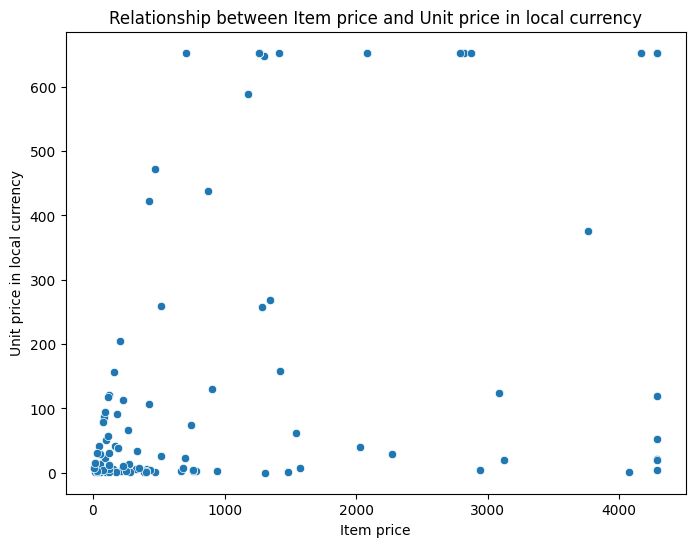

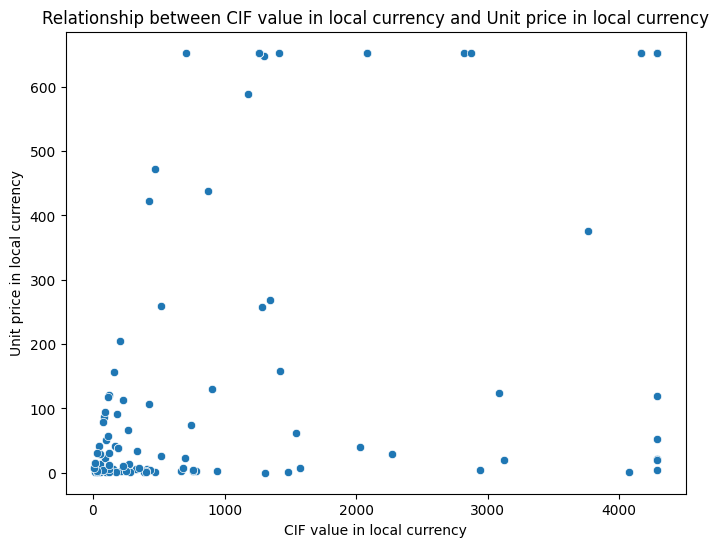

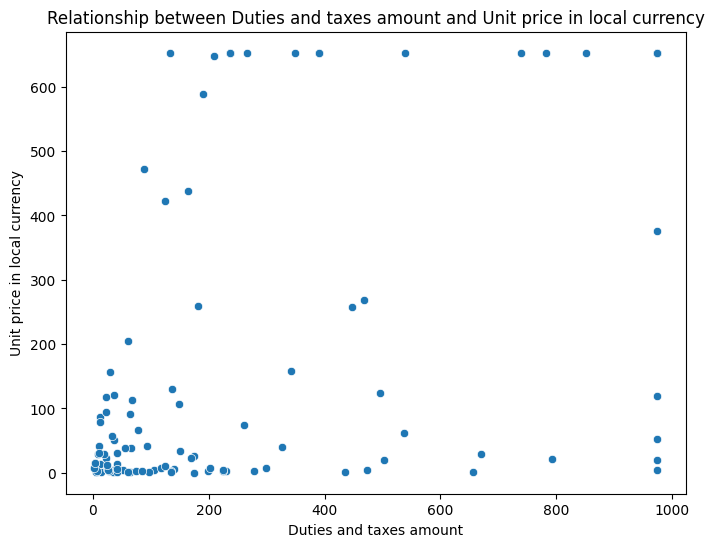

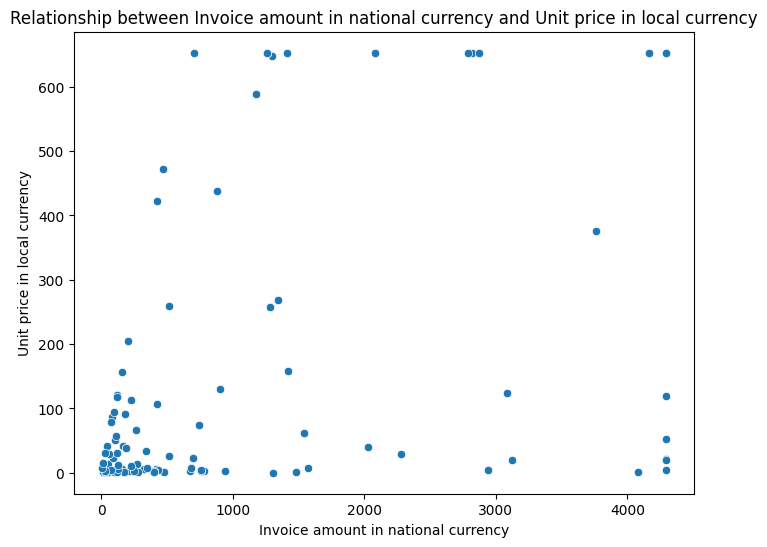

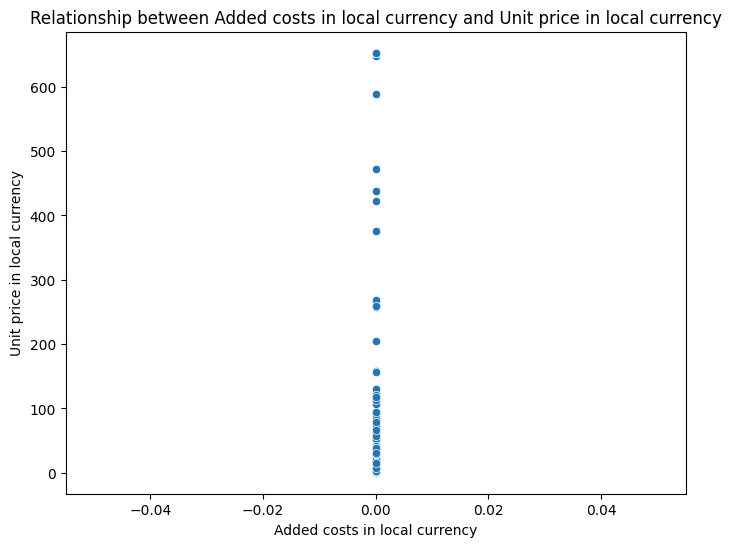

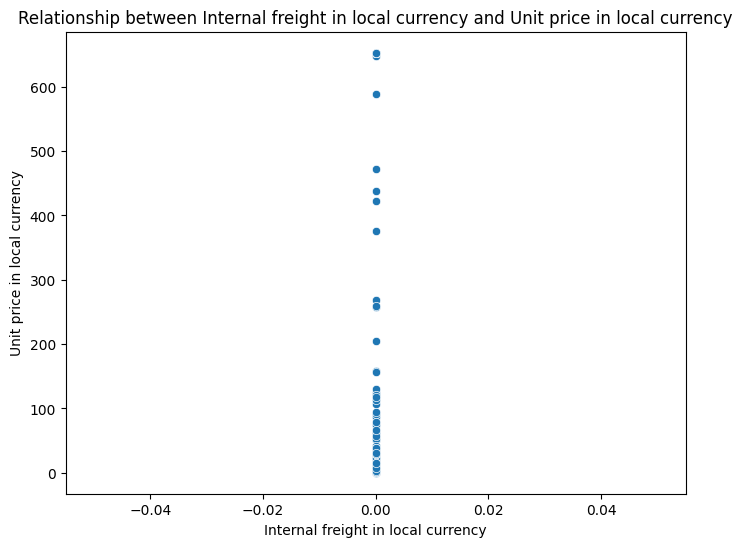

In [ ]:
# Scatter plots for relationships between numerical features and 'Unit price in local currency'
for col in numerical_features:
    if col != 'Unit price in local currency':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data_processed[col], y=data_processed['Unit price in local currency'])
        plt.title(f'Relationship between {col} and Unit price in local currency')
        plt.xlabel(col)
        plt.ylabel('Unit price in local currency')
        plt.show()

### CORRELATION ANALYSIS

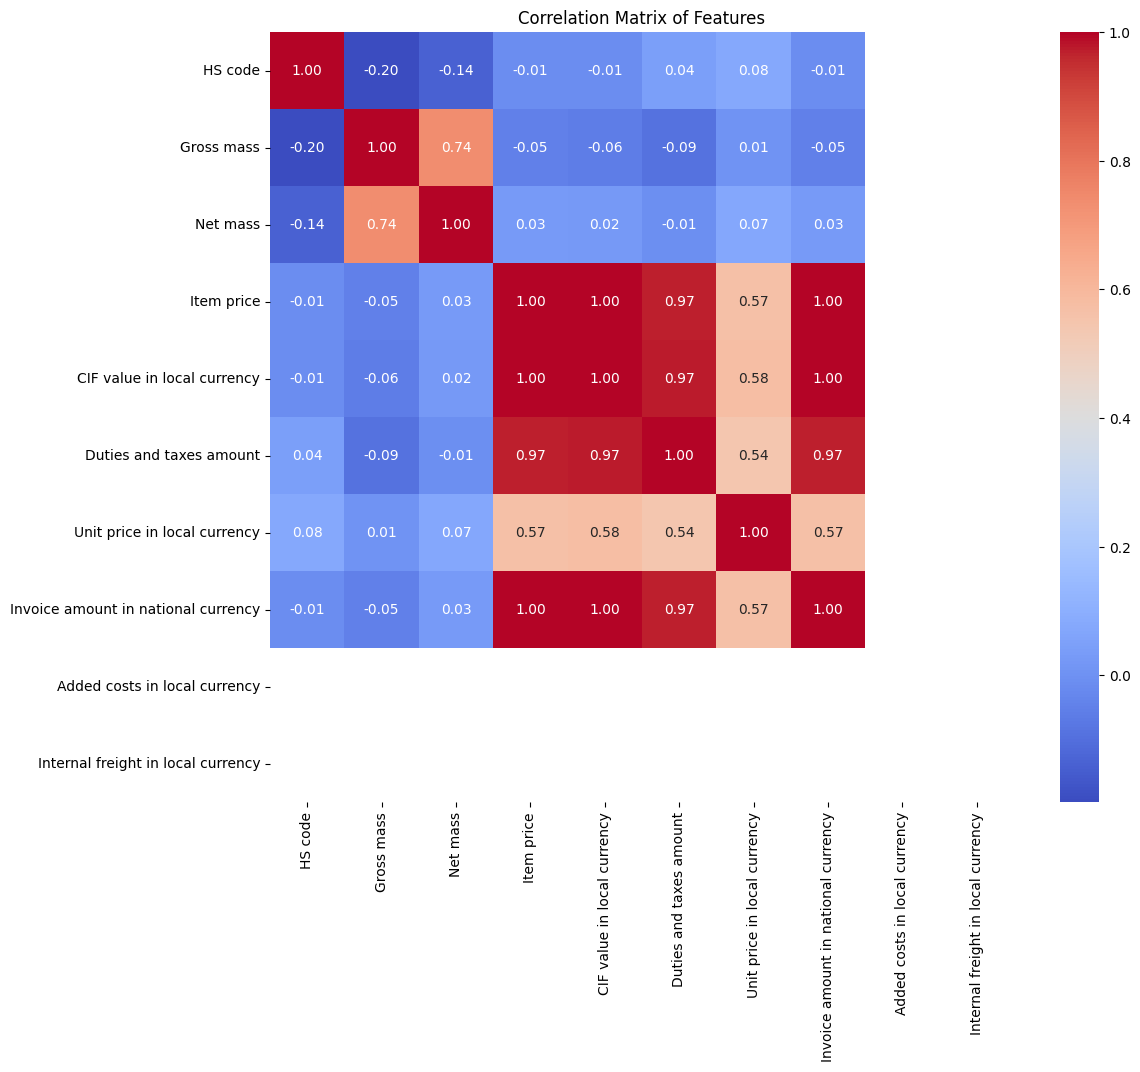

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
# Specify numeric_only=True to only calculate correlations for numerical columns
correlation_matrix = data_processed.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# Select features with a correlation above a certain threshold (e.g., 0.1) with target
target_column = 'Unit price in local currency'
correlation_threshold = 0.1  # Adjust this threshold as needed
correlated_features = correlation_matrix[
    abs(correlation_matrix[target_column]) > correlation_threshold
].index.tolist()

# Remove the target variable itself from the list
correlated_features.remove(target_column)

print(f"Features correlated with '{target_column}' (threshold: {correlation_threshold}): {correlated_features}")

Features correlated with 'Unit price in local currency' (threshold: 0.1): ['Item price', 'CIF value in local currency', 'Duties and taxes amount', 'Invoice amount in national currency']


#### MULTICOLLINEARITY CHECK

In [ ]:
# Multicollinearity Check (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data_processed[correlated_features]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                               feature         VIF
0                           Item price         inf
1          CIF value in local currency  218.238090
2              Duties and taxes amount   33.281188
3  Invoice amount in national currency         inf


In [ ]:
# Features with VIF > 5 are usually problematic.
# Identify and remove high-VIF features iteratively.
def calculate_vif(X):
    vif = pd.DataFrame()
    # Check if the dataframe has enough columns for VIF calculation
    if X.shape[1] > 1:  # Ensure at least 2 columns for VIF
        vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        vif["features"] = X.columns
    else:
        print("Not enough features for VIF calculation.")  # Handle cases with few features
        return pd.DataFrame(columns=['VIF Factor', 'features'])  # Return empty DataFrame if necessary
    return vif

# Iteratively remove features with VIF > 5
while True:
    vif_data = calculate_vif(X)
    # Check if vif_data is empty (meaning not enough features for VIF calculation)
    if vif_data.empty:
        break
    max_vif = vif_data['VIF Factor'].max()

    if max_vif <= 5:  # or some other threshold
        break

    feature_to_remove = vif_data.loc[vif_data['VIF Factor'] == max_vif, 'features'].iloc[0]
    print(f'Removing {feature_to_remove} due to high VIF ({max_vif:.2f})')

    X = X.drop(columns=[feature_to_remove])
    if len(X.columns) == 0:
        break # avoid infinite loop if all features are removed

# Final multicollinearity check
final_vif_data = calculate_vif(X)
print("Final VIF after removing multicollinear features:")
print(final_vif_data)
final_features = X.columns.to_list()
print(f"Final Selected Features: {final_features}")

Not enough features for VIF calculation.
Not enough features for VIF calculation.
Final VIF after removing multicollinear features:
Empty DataFrame
Columns: [VIF Factor, features]
Index: []
Final Selected Features: ['Invoice amount in national currency']


##### Further exploration with ANOVA

In [ ]:
import statsmodels.api as sm
from scipy import stats

# Perform ANOVA for categorical variables
print("ANOVA Results:")
anova_results = []
for col in final_features:
    if data_processed[col].dtype == 'object':  # Check if the feature is categorical
        formula = f'Unit price in local currency ~ C({col})'
        model = sm.OLS.from_formula(formula, data=data_processed).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(f"\nANOVA for {col}:")
        print(anova_table)
        anova_results.append((col, anova_table["PR(>F)"].iloc[0]))  # Extract p-value

# Perform correlation for numeric variables
print("\nCorrelation with Target Variable:")
correlation_results = []
for col in final_features:
    if data_processed[col].dtype != 'object':  # Check if the feature is numeric
        correlation_coefficient, p_value = stats.pearsonr(data_processed['Unit price in local currency'], data_processed[col])
        print(f"{col}:")
        print(f"  Correlation: {correlation_coefficient:.4f}")
        print(f"  P-value: {p_value:.4f}")
        correlation_results.append((col, correlation_coefficient, p_value))

# Summarize Results
anova_summary = pd.DataFrame(anova_results, columns=['Feature', 'ANOVA P-Value'])
correlation_summary = pd.DataFrame(correlation_results, columns=['Feature', 'Correlation Coefficient', 'P-Value'])

print("\nANOVA Summary:")
print(anova_summary)

print("\nCorrelation Summary:")
print(correlation_summary)


ANOVA Results:

Correlation with Target Variable:
Invoice amount in national currency:
  Correlation: 0.5682
  P-value: 0.0000

ANOVA Summary:
Empty DataFrame
Columns: [Feature, ANOVA P-Value]
Index: []

Correlation Summary:
                               Feature  Correlation Coefficient       P-Value
0  Invoice amount in national currency                 0.568207  7.795772e-11


###FEATURE ENGINEERING

In [ ]:
# check for proper column names
data_processed.columns

Index(['HS code', 'Country of origin - code', 'Gross mass', 'Net mass',
       'Item price', 'CIF value in local currency', 'Duties and taxes amount',
       'Unit price in local currency', 'Invoice amount in national currency',
       'Currency code for the invoice', 'Added costs in local currency',
       'Internal freight in local currency'],
      dtype='object')

In [ ]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 3 to 264
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   HS code                              111 non-null    float64
 1   Country of origin - code             111 non-null    object 
 2   Gross mass                           111 non-null    float64
 3   Net mass                             111 non-null    float64
 4   Item price                           111 non-null    float64
 5   CIF value in local currency          111 non-null    float64
 6   Duties and taxes amount              111 non-null    float64
 7   Unit price in local currency         111 non-null    float64
 8   Invoice amount in national currency  111 non-null    float64
 9   Currency code for the invoice        111 non-null    object 
 10  Added costs in local currency        111 non-null    float64
 11  Internal freight in local currency   

### Feature Engineering Steps:
#### Label Encoding for Categorical Variables:

##### Encode Country of origin - code and Currency code for the invoice.
##### Feature Interaction Creation:

##### Weight Ratios:
##### Net mass / Gross mass to represent the proportion of product weight.
###### Monetary Ratios:
##### CIF value in local currency / Gross mass as CIF value per unit weight.
##### Duties and taxes amount / Gross mass as tax per unit weight.

### summary
Number of Observations: 111.
Numeric Features (9): Continuous variables (e.g., Gross mass, Net mass, Item price).
Categorical Features (2): Country of origin - code and Currency code for the invoice.

In [ ]:
# Copy the data for transformation
data_transformed = data_processed.copy()

# Step 1: Label Encode Categorical Variables
label_encoders = {}
categorical_columns = ['Country of origin - code', 'Currency code for the invoice']

for col in categorical_columns:
    le = LabelEncoder()
    data_transformed[col] = le.fit_transform(data_transformed[col])
    label_encoders[col] = le  # Save the encoder for future use

In [ ]:
# Step 2: Create Feature Interactions
# Weight Ratio
data_transformed['Net_to_Gross_Ratio'] = data_transformed['Net mass'] / data_transformed['Gross mass']

# Monetary Ratios
data_transformed['CIF_per_Unit_Weight'] = data_transformed['CIF value in local currency'] / data_transformed['Gross mass']
data_transformed['Taxes_per_Unit_Weight'] = data_transformed['Duties and taxes amount'] / data_transformed['Gross mass']

In [ ]:
data_transformed.head(5)

,HS code,Country of origin - code,Gross mass,Net mass,Item price,CIF value in local currency,Duties and taxes amount,Unit price in local currency,Invoice amount in national currency,Currency code for the invoice,Added costs in local currency,Internal freight in local currency,Net_to_Gross_Ratio,CIF_per_Unit_Weight,Taxes_per_Unit_Weight
3,91338102.5,3,194.54,150.0,1285.39,1285.39,447.56,257.0780,1285.39,0,0.0,0.0,0.771050,6.607330,2.300607
4,91338102.5,3,194.54,150.0,1344.86,1344.86,468.26,268.9720,1344.86,0,0.0,0.0,0.771050,6.913026,2.407011
5,85181000.0,3,77.82,50.0,102.91,102.91,35.81,51.4550,102.91,0,0.0,0.0,0.642508,1.322411,0.460164
6,91338102.5,3,972.72,900.0,1543.66,1543.66,537.49,61.7464,1543.66,0,0.0,0.0,0.925241,1.586952,0.552564
7,85163100.0,3,155.64,124.0,164.66,164.66,92.55,41.1650,164.66,0,0.0,0.0,0.796710,1.057954,0.594641


### DATA SCALING

In [ ]:
# Identify numeric columns
numeric_columns = [
    'HS code', 'Gross mass', 'Net mass', 'Item price',
    'CIF value in local currency', 'Duties and taxes amount',
    'Unit price in local currency', 'Invoice amount in national currency',
    'Added costs in local currency', 'Internal freight in local currency',
    'Net_to_Gross_Ratio', 'CIF_per_Unit_Weight', 'Taxes_per_Unit_Weight'
]

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numeric columns
data_transformed[numeric_columns] = scaler.fit_transform(data_transformed[numeric_columns])

# Display the scaled dataset
print("Scaled Dataset:")

Scaled Dataset:


### CORRELATION ANALYSIS

In [ ]:
# Threshold for strong correlation
correlation_threshold = 0.3

# Select features with strong correlation with the target
selected_features = correlation_with_target[correlation_with_target.abs() > correlation_threshold].index.tolist()

# Remove the target from selected features
selected_features.remove('Unit price in local currency')

print("\nSelected Features:")
print(selected_features)



Selected Features:
['HS code', 'Gross mass', 'Net mass', 'Item price', 'CIF value in local currency', 'Duties and taxes amount', 'Invoice amount in national currency', 'Added costs in local currency', 'Internal freight in local currency', 'Net_to_Gross_Ratio', 'CIF_per_Unit_Weight', 'Taxes_per_Unit_Weight', 'Unit price in local currency']


### MULTICOLLINEARITY CHECK WITH variance information factor. VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for selected features
vif_data = pd.DataFrame()
vif_data['Feature'] = selected_features
vif_data['VIF'] = [
    variance_inflation_factor(data_transformed[selected_features].values, i)
    for i in range(len(selected_features))
]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)

# Drop features with high VIF (e.g., VIF > 10 indicates multicollinearity)
selected_features_final = vif_data[vif_data['VIF'] <= 10]['Feature'].tolist()

print("\nFinal Selected Features:")
print(selected_features_final)



Variance Inflation Factor (VIF):
                                Feature         VIF
0                               HS code    1.116258
1                            Gross mass   10.486064
2                              Net mass    7.826963
3                            Item price         inf
4           CIF value in local currency  134.473737
5               Duties and taxes amount   22.571140
6   Invoice amount in national currency         inf
7         Added costs in local currency         NaN
8    Internal freight in local currency         NaN
9                    Net_to_Gross_Ratio    4.904822
10                  CIF_per_Unit_Weight   29.202611
11                Taxes_per_Unit_Weight   29.245411
12         Unit price in local currency    1.750084

Final Selected Features:
['HS code', 'Net mass', 'Net_to_Gross_Ratio', 'Unit price in local currency']


In [ ]:
data_transformed.head()

,HS code,Country of origin - code,Gross mass,Net mass,Item price,CIF value in local currency,Duties and taxes amount,Unit price in local currency,Invoice amount in national currency,Currency code for the invoice,Added costs in local currency,Internal freight in local currency,Net_to_Gross_Ratio,CIF_per_Unit_Weight,Taxes_per_Unit_Weight
3,1.486554,3,-0.897100,-0.767657,0.016076,0.006976,0.512002,0.292798,0.016076,0,0.0,0.0,-0.001598,0.112847,0.234307
4,1.486554,3,-0.897100,-0.767657,0.055643,0.046016,0.575733,0.339375,0.055643,0,0.0,0.0,-0.001598,0.129934,0.257909
5,-0.110986,3,-0.910040,-0.783635,-0.770665,-0.769272,-0.755684,-0.512417,-0.770665,0,0.0,0.0,-0.407612,-0.182549,-0.173925
6,1.486554,3,-0.810824,-0.647817,0.187911,0.176520,0.788877,-0.472116,0.187911,0,0.0,0.0,0.485433,-0.167763,-0.153429
7,-0.115630,3,-0.901412,-0.771811,-0.729581,-0.728736,-0.580994,-0.552712,-0.729581,0,0.0,0.0,0.079455,-0.197331,-0.144096


## Recommended Features for Modeling
### Based on domain logic and feature relevance:

### HS Code, Country of Origin - Code, Gross Mass, Net Mass, Item Price, CIF Value in Local Currency, Duties and Taxes Amount, Net_to_Gross_Ratio, CIF_per_Unit_Weight, Taxes_per_Unit_Weight


#### Features Analysis
HS Code:

Represents the product category.
Highly relevant, as product type significantly affects pricing.
Country of Origin - Code:

Indicates the source of the product.
Can influence costs due to trade policies, tariffs, or quality differences.
Include as a categorical variable (after encoding).
Gross Mass and Net Mass:

Critical for cost calculations (e.g., shipping costs are weight-dependent).
Use both but consider their ratio (Net_to_Gross_Ratio) for additional insight.
Item Price:

Indicates the base cost before adjustments (freight, taxes, etc.).
Likely highly correlated with the target and essential for modeling.
CIF Value in Local Currency:

Includes freight and insurance costs.
Directly impacts the unit price, making it very relevant.
Duties and Taxes Amount:

Explicitly adds to the final cost.
A direct contributor to the target variable.
Invoice Amount in National Currency:

Could be redundant with CIF, but it provides a holistic view of costs.
Keep for now unless multicollinearity is detected.
Currency Code for the Invoice:

Less directly relevant if all monetary values are standardized to a single currency.
Exclude unless variations in currency affect price dynamics.
Added Costs in Local Currency and Internal Freight in Local Currency:

Affect the final cost structure and should be retained.
However, they might exhibit multicollinearity with CIF or taxes.
Net_to_Gross_Ratio:

Derived feature that captures packaging impact on cost per unit.
May add insight depending on its variability across products.
CIF_per_Unit_Weight:

Captures cost efficiency related to weight.
Likely a strong contributor due to its composite nature.
Taxes_per_Unit_Weight:

Helps normalize taxes relative to size.
Can uncover tax efficiency patterns across products.

## MODEL BUILDING

DEFINING THE TARGET VARIABLE AND THE FEATURES

In [ ]:
# Define target and features
target = 'Unit price in local currency'
features = [
    'HS code', 'Country of origin - code', 'Gross mass', 'Net mass', 'Item price',
    'CIF value in local currency', 'Duties and taxes amount', 'Net_to_Gross_Ratio',
    'CIF_per_Unit_Weight', 'Taxes_per_Unit_Weight'
]


SPLITTING THE DATASET

In [ ]:
# Split data into training and testing sets
X = data_transformed[features]
y = data_transformed[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

THE LINEAR REGRESSION MODEL

In [ ]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

MAKING PREDICTIONS WITH THE LINEAR REGRESSION MODEL

In [ ]:
# Predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

EVALUATING THE LINEAR REGRESSION MODEL

In [ ]:
# Evaluation
print("Model Performance on Training Data:")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")
print(f"R²: {r2_score(y_train, y_pred_train):.4f}")

print("\nModel Performance on Test Data:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")
print(f"R²: {r2_score(y_test, y_pred_test):.4f}")

Model Performance on Training Data:
MAE: 0.5154
RMSE: 0.6882
R²: 0.5508

Model Performance on Test Data:
MAE: 0.6248
RMSE: 0.8318
R²: 0.0471


The performance on the training data looks to be satisfactory, with reasonable MAE and RMSE values and a moderate R². However, the model's performance on the test data indicates significant overfitting, as the test MAE, RMSE, and R² show much poorer results

suggested steps:
Model Complexity: Lets Consider simplifying the model or applying regularization techniques (e.g., Ridge or Lasso Regression) to reduce overfitting.
Feature Engineering: Reevaluating feature selection and transformations (e.g., log-transformations for skewed features).
Model Selection: Trying more complex models, such as Random Forest, Gradient Boosting, or XGBoost, which may handle the non-linearity and complexity of the relationships in the data better.

RIDGE MODEL

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge_model.fit(X_train, y_train)
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)

print("Ridge Regression Model Performance:")
print("Training Data:")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train_ridge):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)):.4f}")
print(f"R²: {r2_score(y_train, y_pred_train_ridge):.4f}")

print("\nTest Data:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test_ridge):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)):.4f}")
print(f"R²: {r2_score(y_test, y_pred_test_ridge):.4f}")

Ridge Regression Model Performance:
Training Data:
MAE: 0.5412
RMSE: 0.7103
R²: 0.5216

Test Data:
MAE: 0.5245
RMSE: 0.6761
R²: 0.3705


LASSO MODEL

In [ ]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can tune the alpha parameter
lasso_model.fit(X_train, y_train)
y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_test_lasso = lasso_model.predict(X_test)

print("\nLasso Regression Model Performance:")
print("Training Data:")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train_lasso):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)):.4f}")
print(f"R²: {r2_score(y_train, y_pred_train_lasso):.4f}")

print("\nTest Data:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test_lasso):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)):.4f}")
print(f"R²: {r2_score(y_test, y_pred_test_lasso):.4f}")


Lasso Regression Model Performance:
Training Data:
MAE: 0.8937
RMSE: 1.0269
R²: 0.0000

Test Data:
MAE: 0.7940
RMSE: 0.8992
R²: -0.1136


RANDOM FOREST MODEL

In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # We can tune n_estimators and other hyperparameters
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the training and test data
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [ ]:
# Performance evaluation
print("\nRandom Forest Model Performance:")
print("Training Data:")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train_rf):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_rf)):.4f}")
print(f"R²: {r2_score(y_train, y_pred_train_rf):.4f}")

print("\nTest Data:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test_rf):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_rf)):.4f}")
print(f"R²: {r2_score(y_test, y_pred_test_rf):.4f}")


Random Forest Model Performance:
Training Data:
MAE: 0.1696
RMSE: 0.2572
R²: 0.9373

Test Data:
MAE: 0.2404
RMSE: 0.3497
R²: 0.8316


XG BOOST MODEL

In [ ]:
import xgboost as xgb
# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42, learning_rate=0.1)  # You can tune hyperparameters like n_estimators, learning_rate, etc.
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions on the training and test data
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

In [ ]:
# Performance evaluation
print("\nXGBoost Model Performance:")
print("Training Data:")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train_xgb):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_xgb)):.4f}")
print(f"R²: {r2_score(y_train, y_pred_train_xgb):.4f}")

print("\nTest Data:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test_xgb):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_xgb)):.4f}")
print(f"R²: {r2_score(y_test, y_pred_test_xgb):.4f}")


XGBoost Model Performance:
Training Data:
MAE: 0.0052
RMSE: 0.0076
R²: 0.9999

Test Data:
MAE: 0.2423
RMSE: 0.5066
R²: 0.6465


## Conclusion:
### Best Model for Generalization: Random Forest emerges as the best model for this task, achieving a strong R² score (0.8316) on the test data and balanced MAE and RMSE. It appears to generalize well compared to other models.
### Overfitting Concern with XGBoost: While XGBoost excels on training data, it suffers from overfitting, as indicated by the large gap between its training and test performance. This suggests the need for further tuning, especially on regularization and learning rate.
### Poor Performance of Lasso and Linear Models: The performance of Lasso and Linear Regression models was notably weaker, with Lasso showing over-penalization and Linear Regression failing to generalize well.

## Model Comparison Visualization:

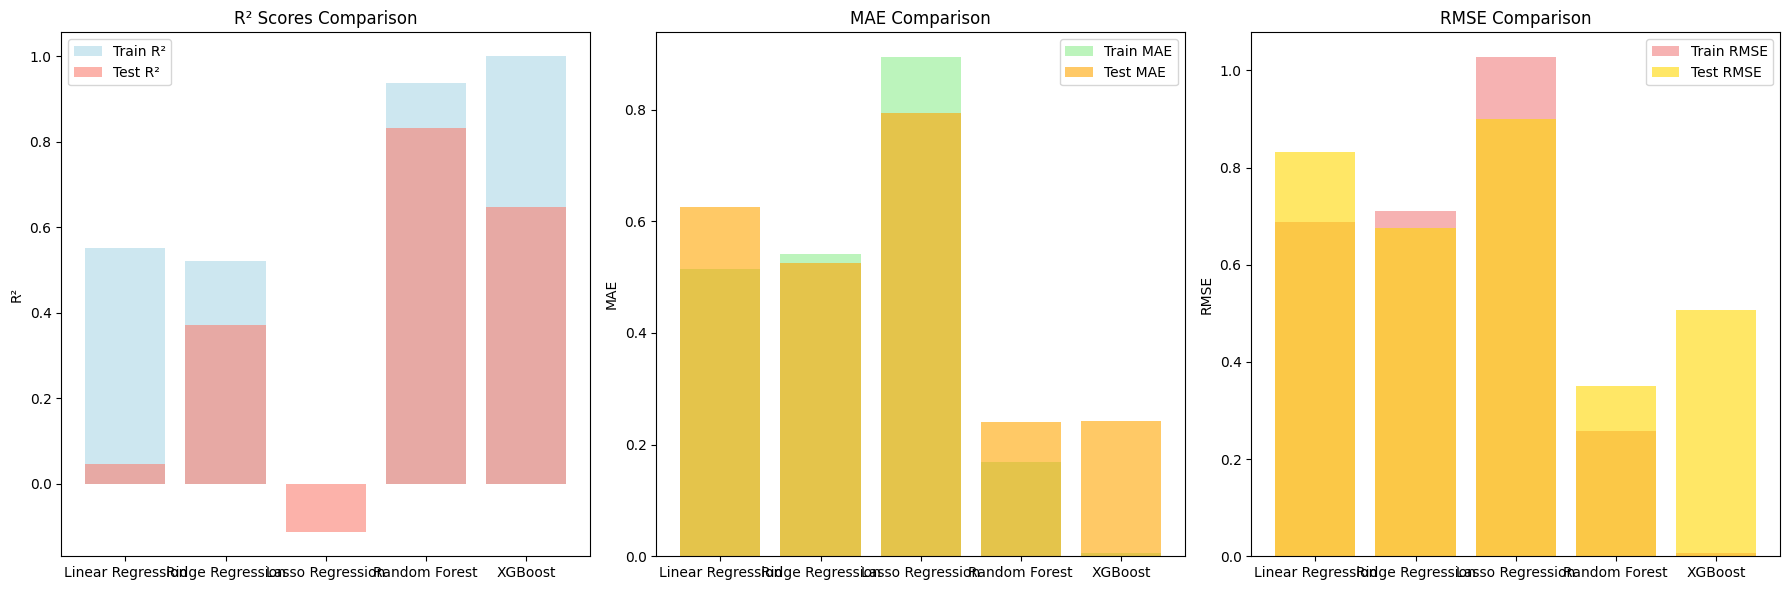

In [ ]:
# Define model names and performance metrics
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest', 'XGBoost']
r2_train = [0.5508, 0.5216, 0.0000, 0.9373, 0.9999]
r2_test = [0.0471, 0.3705, -0.1136, 0.8316, 0.6465]
mae_train = [0.5154, 0.5412, 0.8937, 0.1696, 0.0052]
mae_test = [0.6248, 0.5245, 0.7940, 0.2404, 0.2423]
rmse_train = [0.6882, 0.7103, 1.0269, 0.2572, 0.0076]
rmse_test = [0.8318, 0.6761, 0.8992, 0.3497, 0.5066]

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot R² scores
axs[0].bar(models, r2_train, alpha=0.6, label='Train R²', color='lightblue')
axs[0].bar(models, r2_test, alpha=0.6, label='Test R²', color='salmon')
axs[0].set_title('R² Scores Comparison')
axs[0].set_ylabel('R²')
axs[0].legend()

# Plot MAE
axs[1].bar(models, mae_train, alpha=0.6, label='Train MAE', color='lightgreen')
axs[1].bar(models, mae_test, alpha=0.6, label='Test MAE', color='orange')
axs[1].set_title('MAE Comparison')
axs[1].set_ylabel('MAE')
axs[1].legend()

# Plot RMSE
axs[2].bar(models, rmse_train, alpha=0.6, label='Train RMSE', color='lightcoral')
axs[2].bar(models, rmse_test, alpha=0.6, label='Test RMSE', color='gold')
axs[2].set_title('RMSE Comparison')
axs[2].set_ylabel('RMSE')
axs[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
# save the best model. that is the random forest model

import joblib

# 'rf_model' is my trained RandomForestRegressor
joblib.dump(rf_model, 'best_model_regression.pkl')
print("Best model saved as best_model_regression.pkl")


Best model saved as best_model_regression.pkl


## BUILDING THE ARTIFICIAL NEURAL NETWORK

To build a neural network for my regression task, i am to use Keras (with TensorFlow backend) to construct a deep learning model.

Steps for Building the Neural Network:
Prepare Data: Use the features after scaling and transforming.
Build Neural Network: Use Keras to build a multi-layer neural network.
Compile the Model: Choose an appropriate optimizer, loss function, and evaluation metric.
Train the Model: Train the model on the training data and evaluate on the test data.
Evaluate Performance: Assess the performance of the model on both training and test data.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
# Define the neural network architecture
def build_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))  # First hidden layer
    model.add(Dropout(0.2))  # Dropout for regularization
    model.add(Dense(64, activation='relu'))  # Second hidden layer
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))  # Third hidden layer
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

In [ ]:
# Prepare the data for the neural network (using scaled data)
X_train_nn = X_train
X_test_nn = X_test
y_train_nn = y_train
y_test_nn = y_test

In [ ]:
# Build the model
model_nn = build_nn_model(X_train_nn.shape[1])

In [ ]:
# Train the model
history = model_nn.fit(X_train_nn, y_train_nn, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 4.0029 - mae: 1.4861 - mse: 4.0029 - val_loss: 0.9660 - val_mae: 0.8084 - val_mse: 0.9660
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.6876 - mae: 0.9536 - mse: 1.6876 - val_loss: 1.4877 - val_mae: 1.1627 - val_mse: 1.4877
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.8046 - mae: 1.1156 - mse: 1.8046 - val_loss: 1.8857 - val_mae: 1.2683 - val_mse: 1.8857
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.5651 - mae: 1.0154 - mse: 1.5651 - val_loss: 1.6454 - val_mae: 1.2029 - val_mse: 1.6454
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.6656 - mae: 1.0997 - mse: 1.6656 - val_loss: 1.1328 - val_mae: 1.0272 - val_mse: 1.1328
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.4900 - mae: 1.0081 - mse: 1.4900 - val_loss: 0.8559 - val_mae: 0.8532 - val_mse: 0.8559
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.2510 - mae: 0.9009 - mse: 1.2510 - val_loss: 0.8214

In [ ]:
# Make predictions
y_pred_train_nn = model_nn.predict(X_train_nn)
y_pred_test_nn = model_nn.predict(X_test_nn)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


In [ ]:
# Evaluate performance on training and test data
print("\nNeural Network Model Performance:")
print("Training Data:")
print(f"MAE: {mean_absolute_error(y_train_nn, y_pred_train_nn):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train_nn, y_pred_train_nn)):.4f}")
print(f"R²: {r2_score(y_train_nn, y_pred_train_nn):.4f}")

print("\nTest Data:")
print(f"MAE: {mean_absolute_error(y_test_nn, y_pred_test_nn):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_nn, y_pred_test_nn)):.4f}")
print(f"R²: {r2_score(y_test_nn, y_pred_test_nn):.4f}")


Neural Network Model Performance:
Training Data:
MAE: 0.3941
RMSE: 0.6045
R²: 0.6534

Test Data:
MAE: 0.3037
RMSE: 0.3848
R²: 0.7961


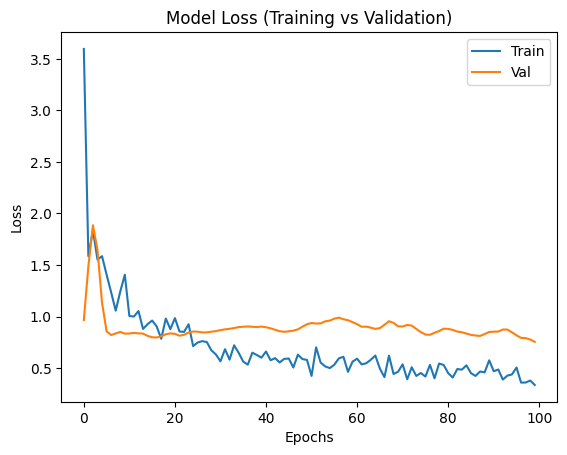

In [ ]:
# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (Training vs Validation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


### ANALYSIS ON RESULTS

The R² on the test data is excellent at 0.7961, meaning that the model explains approximately 80% of the variance in the target variable on the test set. This is a strong indicator of the model's predictive power, especially in regression tasks. The training R² (0.6534) suggests that the model is capturing a solid portion of the variance in the training data but leaves room for improvement.

### Model Strengths:
Generalization: The neural network appears to generalize well to unseen data, as evidenced by the strong performance on the test set, particularly with the R² score. This is a positive sign that the model has not overfitted to the training data.
Predictive Accuracy: The model achieves reasonable predictive accuracy on both training and test data, with a significant improvement from training MAE/RMSE to test MAE/RMSE. This indicates the model’s ability to learn and apply the underlying patterns effectively.
### Potential Areas for Improvement:
Further Hyperparameter Tuning: While the model performs well, there is always room for improvement through hyperparameter optimization. Consideration on tuning the network's architecture, learning rate, or dropout rate to improve performance further.
Overfitting Check: Although the neural network generalizes well in this case, it's important to always monitor for overfitting in more complex models or larger datasets. Techniques like early stopping could be used to prevent this.
Additional Feature Engineering: Exploring additional features or transformations, such as interaction terms, polynomial features, or non-linear scaling, may improve model performance further.
## Conclusion:
Overall, the neural network model performs strongly on the test data, with an R² of 0.7961. It outperforms the simpler regression models in terms of predictive accuracy. While the model has potential, further tuning of the neural network's architecture and hyperparameters could potentially yield even better results.








## OVERRALL RESULTS

| **Model**               | **Training MAE** | **Test MAE** | **Training RMSE** | **Test RMSE** | **Training R²** | **Test R²** |
|-------------------------|------------------|--------------|-------------------|---------------|-----------------|-------------|
| **Linear Regression**    | 0.5154           | 0.6248       | 0.6882            | 0.8318        | 0.5508          | 0.0471      |
| **Ridge Regression**     | 0.5412           | 0.5245       | 0.7103            | 0.6761        | 0.5216          | 0.3705      |
| **Lasso Regression**     | 0.8937           | 0.7940       | 1.0269            | 0.8992        | 0.0000          | -0.1136     |
| **Random Forest**        | 0.1696           | 0.2404       | 0.2572            | 0.3497        | 0.9373          | 0.8316      |
| **XGBoost**              | 0.0052           | 0.2423       | 0.0076            | 0.5066        | 0.9999          | 0.6465      |
| **Neural Network**       | 0.3941           | 0.3037       | 0.6045            | 0.3848        | 0.6534          | 0.7961      |


The best model among all is the Random forest. It has the highest R² on the test data (0.8316), and its predictive accuracy (low MAE and RMSE) demonstrates its ability to generalize well to unseen data. Despite the potential for further improvement through hyperparameter tuning, the model outperforms the other models in terms of overall predictive performance.

# DEPLOYMENT

In [ ]:
import streamlit as st

# Load the trained RandomForestRegressor model
model = joblib.load('best_model_regression.pkl')

# Define the features for the model
features = [
    'HS code', 'Country of origin - code', 'Gross mass', 'Net mass', 'Item price',
    'CIF value in local currency', 'Duties and taxes amount', 'Net_to_Gross_Ratio',
    'CIF_per_Unit_Weight', 'Taxes_per_Unit_Weight'
]

# Create the Streamlit app with title and subtitles
st.title("IMPORT COST PREDICTION APP")
st.subheader("Developed by Paul Sentongo")
st.write("A Master of Science in Data Science and Analytics Final Project")
st.write("The Uganda Christian University")

# Input fields for user input
input_data = {}
for feature in features:
    input_data[feature] = st.number_input(f"Enter {feature}", value=0.0)

# Create a Pandas DataFrame from the input data
input_df = pd.DataFrame([input_data])

# Make predictions
if st.button("Predict"):
    try:
        prediction = model.predict(input_df)
        st.write(f"Predicted Unit Price: {prediction[0]:.2f}")
    except ValueError as e:
        st.error(f"Error during prediction: {e}")


2024-12-02 21:20:01.203 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 21:20:01.339 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-02 21:20:01.342 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 21:20:01.344 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 21:20:01.346 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 21:20:01.348 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 21:20:01.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 21:20:01.352 Thread 'MainThread': mi

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Placeholder for data_transformed -  replace with your actual data loading and preprocessing
data_transformed = pd.DataFrame({
    'Unit price in local currency': [10, 20, 30, 40, 50],
    'HS code': [1, 2, 3, 4, 5],
    'Country of origin - code': [1, 2, 3, 4, 5],
    'Gross mass': [100, 200, 300, 400, 500],
    'Net mass': [90, 180, 270, 360, 450],
    'Item price': [5, 10, 15, 20, 25],
    'CIF value in local currency': [1000, 2000, 3000, 4000, 5000],
    'Duties and taxes amount': [100, 200, 300, 400, 500],
    'Net_to_Gross_Ratio': [0.9, 0.9, 0.9, 0.9, 0.9],
    'CIF_per_Unit_Weight': [10, 10, 10, 10, 10],
    'Taxes_per_Unit_Weight': [1, 1, 1, 1, 1]
})

# Load the trained RandomForestRegressor model
try:
    model = joblib.load('best_model_regression.pkl')
except FileNotFoundError:
    st.error("Error: best_model_regression.pkl not found. Please train and save the model first.")
    model = None # Or handle the error differently

# Define the features for the model
features = [
    'HS code', 'Country of origin - code', 'Gross mass', 'Net mass', 'Item price',
    'CIF value in local currency', 'Duties and taxes amount', 'Net_to_Gross_Ratio',
    'CIF_per_Unit_Weight', 'Taxes_per_Unit_Weight'
]

# Create the Streamlit app with title and subtitles
st.title("IMPORT COST PREDICTION APP")
st.subheader("Developed by Paul Sentongo")
st.write("A Master of Science in Data Science and Analytics Final Project")
st.write("The Uganda Christian University")

# Input fields for user input
input_data = {}
for feature in features:
    input_data[feature] = st.number_input(f"Enter {feature}", value=0.0)

# Create a Pandas DataFrame from the input data
input_df = pd.DataFrame([input_data])

# Make predictions
if st.button("Predict"):
    if model:
        try:
            prediction = model.predict(input_df)
            st.write(f"Predicted Unit Price: {prediction[0]:.2f}")
        except ValueError as e:
            st.error(f"Error during prediction: {e}")
    else:
        st.warning("Model not loaded. Prediction cannot be performed.")




Overwriting app.py


In [ ]:
!pip install pyngrok

In [ ]:
!ngrok config add-authtoken 2pg5VvOcCwqq2YT5UpqFYVnSqy8_42gnm1cfztPvkuDvZjsrQ

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!ngrok authtoken 2pg5VvOcCwqq2YT5UpqFYVnSqy8_42gnm1cfztPvkuDvZjsrQ #Replace with your authtoken

# Set the port for the Streamlit app (default is 8501)
port = 8501

# Open a tunnel to the Streamlit app
from pyngrok import ngrok
public_url = ngrok.connect(port)
print(f"Streamlit app is live at: {public_url}")

# Run the Streamlit app
!streamlit run app.py &

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit app is live at: NgrokTunnel: "https://8da8-34-136-176-204.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.136.176.204:8501

